<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [5]:
df = pd.read_csv("DMV_Written_Tests.csv")
df.head(10)

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


### Task 3: Visualize the Data
---

In [5]:
print(df.shape)
print(df.describe())
print(df.isnull())

(100, 3)
       DMV_Test_1  DMV_Test_2     Results
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000
    DMV_Test_1  DMV_Test_2  Results
0        False       False    False
1        False       False    False
2        False       False    False
3        False       False    False
4        False       False    False
..         ...         ...      ...
95       False       False    False
96       False       False    False
97       False       False    False
98       False       False    False
99       False       False    False

[100 rows x 3 columns]


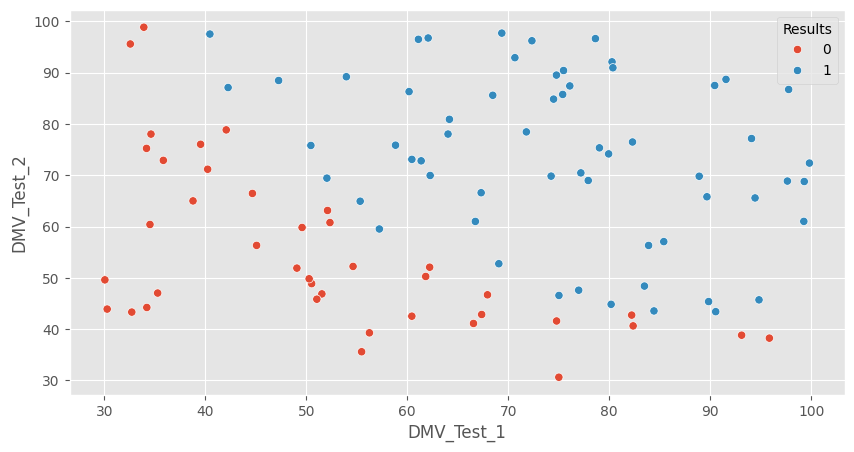

In [6]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", data=df, hue="Results")
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
print(sigmoid(11))

0.999983298578152


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [8]:
from sklearn.preprocessing import StandardScaler


X_raw = df[["DMV_Test_1", "DMV_Test_2"]].values
y = df["Results"].values


scaler = StandardScaler()
X_feat = scaler.fit_transform(X_raw)


X = np.c_[np.ones(len(X_feat)), X_feat]


theta = np.zeros(X.shape[1])

def cost_and_gradient(X, y, theta):
    m = len(y)
    z = X @ theta
    h = sigmoid(z)
    h = np.clip(h, 1e-15, 1 - 1e-15)
    J = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    G = (1/m) * (X.T @ (h - y))
    return J, G


### Task 6: Cost and Gradient at Initialization
---

In [9]:

J, G = cost_and_gradient(X, y, theta)
print("Initial cost:", J)
print("Initial gradient:", G)


Initial cost: 0.6931471805599453
Initial gradient: [-0.1        -0.28122914 -0.25098615]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [10]:

alpha = 0.1
iterations = 2000
costs = []

for i in range(iterations):
    J, G = cost_and_gradient(X, y, theta)
    theta -= alpha * G
    costs.append(J)
    if i % 200 == 0:
        print(f"Iteration {i}: Cost = {J}")

print("Optimized theta:", theta)



Iteration 0: Cost = 0.6931471805599453
Iteration 200: Cost = 0.2622171763260806
Iteration 400: Cost = 0.231268372620766
Iteration 600: Cost = 0.21971947481820406
Iteration 800: Cost = 0.21389052430974315
Iteration 1000: Cost = 0.2105175841318975
Iteration 1200: Cost = 0.20840558499679454
Iteration 1400: Cost = 0.2070133104725862
Iteration 1600: Cost = 0.2060617155190631
Iteration 1800: Cost = 0.20539372642143014
Optimized theta: [1.50553399 3.54060004 3.28777073]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

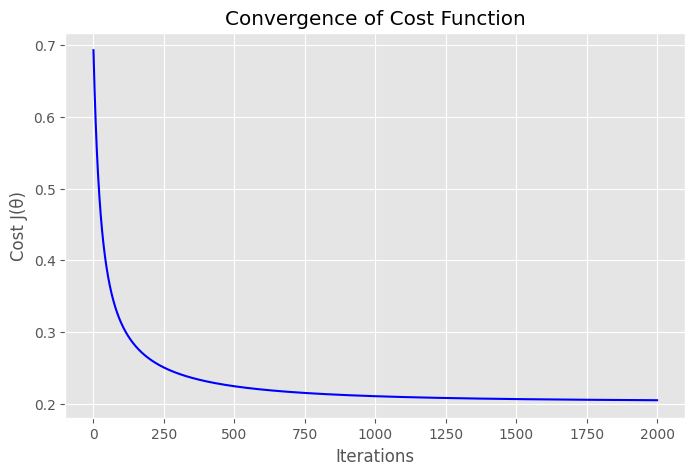

In [11]:

plt.figure(figsize=(8,5))
plt.plot(range(iterations), costs, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost Function")
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

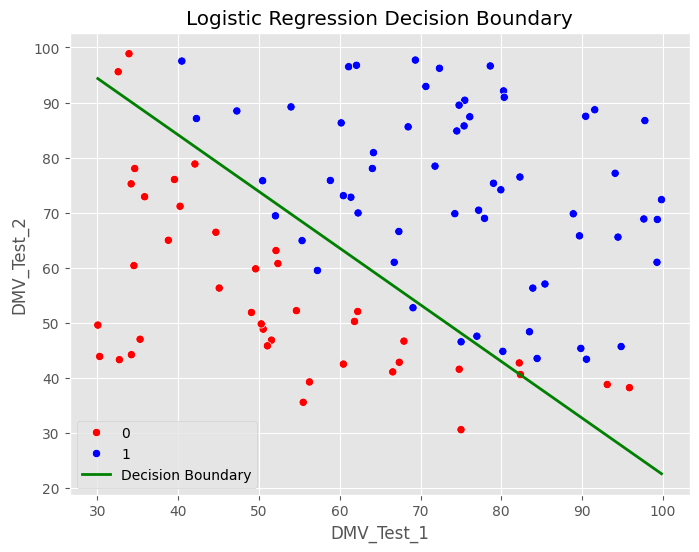

In [12]:


plt.figure(figsize=(8,6))
sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", data=df, hue="Results", palette=["red","blue"])


x1_vals = np.linspace(df["DMV_Test_1"].min(), df["DMV_Test_1"].max(), 200)


x1_scaled = (x1_vals - scaler.mean_[0]) / scaler.scale_[0]

x2_scaled = -(theta[0] + theta[1]*x1_scaled) / theta[2]


x2_vals = x2_scaled * scaler.scale_[1] + scaler.mean_[1]


plt.plot(x1_vals, x2_vals, color="green", linewidth=2, label="Decision Boundary")

plt.xlabel("DMV_Test_1")
plt.ylabel("DMV_Test_2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [13]:

def predict_proba(X, theta):
    return sigmoid(X @ theta)

def predict(X, theta, threshold=0.5):
    return (predict_proba(X, theta) >= threshold).astype(int)


y_pred = predict(X, theta)

accuracy = (y_pred == y).mean()
print("Training Accuracy:", accuracy*100)


Training Accuracy: 89.0
